/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version

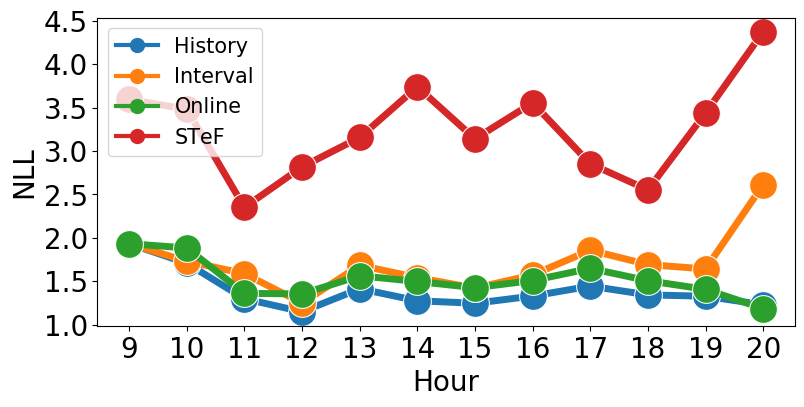

In [6]:
from datetime import datetime, timedelta
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from datetime import datetime, timedelta
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

import re


def get_NLL_list(file_path):
    nll_values = []
    pattern = r"hour NLL: ([\d\.]+)"
    with open(file_path, 'r') as file:
        for line in file:
            match = re.search(pattern, line)
            if match:
                nll_values.append(float(match.group(1)))
    return nll_values

def get_NLL_txt(file_path):
    nll_values = []
    
    nll_values = pd.read_csv(file_path, header=None)
    nll_values.columns = ['hour', "mean", "std", "not_find"]
    nll_values = nll_values['mean'].values
    
    return nll_values

nll_lists = {}
# nll_lists["window"] = get_NLL_list('online_mod_res_atc/atc_window.txt')
# nll_lists["all"] = get_NLL_list('online_mod_res_atc/atc_all.txt')
# nll_lists["interval"] = get_NLL_list('online_mod_res_atc/atc_interval.txt')
# nll_lists["online"] = get_NLL_list('online_mod_res_atc/try7/atc_online_0.5.txt')
# nll_lists["stef"] = get_NLL_list('stef_atc_count_no_mod.txt')

nll_lists["all"] = get_NLL_txt('online_mod_res_atc/try7/atc_all_total_v2.txt')
nll_lists["interval"] = get_NLL_txt('online_mod_res_atc/try7/atc_interval_total_v2.txt')
nll_lists["online"] = get_NLL_txt('online_mod_res_atc/try7/atc_online_total_v3.txt')
# nll_lists["stef"] = get_NLL_list('stef_atc_count_no_mod.txt')
nll_lists["stef"] = get_NLL_txt('stef_atc2.txt')


data = {
    'Sequence': range(9, 21),
    
    # 'Window': nll_lists["window"],
    'History': nll_lists["all"],
    'Interval': nll_lists["interval"],
    'Online': nll_lists["online"],
    'STeF': nll_lists["stef"],
}
df = pd.DataFrame(data)

# Melting the DataFrame to 'long format'
df_long = df.melt('Sequence', var_name='Type', value_name='NLL')

plt.figure(figsize=(9, 4))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

ax = sns.lineplot(
    data=df_long, 
    x='Sequence', 
    y='NLL', 
    hue='Type', 
    marker='o',
    # style='Type',
    markersize=20,  # Increase marker size
    linewidth=5   # Increase line width
)
# ax.set_yscale('log')

handles, labels = ax.get_legend_handles_labels()
new_handles = [plt.Line2D([], [], marker='o', linestyle='-', color=handle.get_color(), markersize=10, linewidth=3) for handle in handles]
# ax.legend(handles=new_handles, labels=labels, title='', fontsize='15', title_fontsize='13', loc=(0.01, 0.2))
ax.legend(handles=new_handles, labels=labels, title='', fontsize='15', title_fontsize='13', loc="upper left")

# plt.xlabel('Iteration Number', fontsize=20)
plt.xlabel('Hour', fontsize=20)
plt.ylabel('NLL', fontsize=20)

# plt.legend(loc=(0.01, 0.7), fontsize=20)
# legend = plt.legend(fontsize='x-large')  # You can specify 'small', 'medium', 'large', 'x-large', etc.
# for handle in legend.legendHandles:
#     handle.set_markersize(10)  # Set a larger size for markers
#     handle.set_marker('o')
plt.xticks(range(9, 21), fontsize=20)
plt.yticks(fontsize=20)
# plt.grid(True)
# plt.show()
plt.savefig('NLL_hour_ATC.pdf', bbox_inches='tight')
plt.savefig('NLL_hour_ATC.png', bbox_inches='tight')

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version

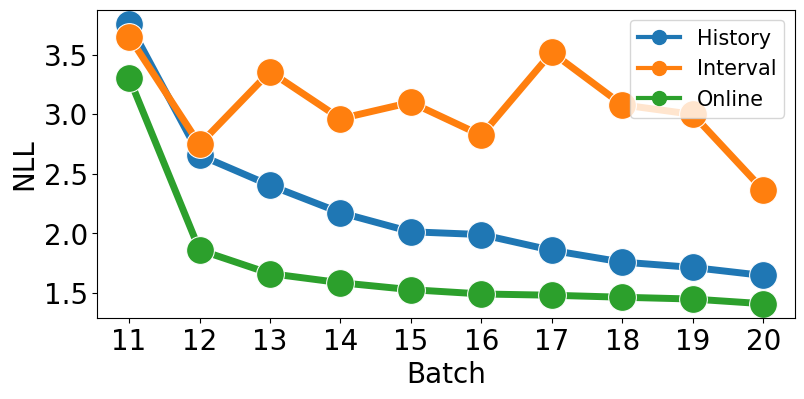

In [9]:
from datetime import datetime, timedelta
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from datetime import datetime, timedelta
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

import re


def get_NLL_txt(file_path):
    nll_values = []
    
    nll_values = pd.read_csv(file_path, header=None)
    nll_values.columns = ['batch', "decay_rate", "mean", "std", "not_find"]
    nll_values = nll_values['mean'].values
    
    return nll_values

nll_lists = {}

nll_lists["all"] = get_NLL_txt("online_mod_res_mapf/try7/mapf_benchmark_all_batches_update.txt")
nll_lists["interval"] = get_NLL_txt("online_mod_res_mapf/try7/mapf_benchmark_interval_batches_update.txt")
nll_lists["online"] = get_NLL_txt("online_mod_res_mapf/try7/mapf_benchmark_online_batches_update.txt")

data = {
    'Sequence': range(11, 21),
    'History': nll_lists["all"],
    'Interval': nll_lists["interval"],
    'Online': nll_lists["online"],
}
df = pd.DataFrame(data)

# Melting the DataFrame to 'long format'
df_long = df.melt('Sequence', var_name='Type', value_name='NLL')

plt.figure(figsize=(9, 4))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
ax = sns.lineplot(
    data=df_long, 
    x='Sequence', 
    y='NLL', 
    hue='Type', 
    marker='o',
    # style='Type',
    markersize=20,  # Increase marker size
    linewidth=5   # Increase line width
)
# ax.set_yscale('log')

handles, labels = ax.get_legend_handles_labels()
new_handles = [plt.Line2D([], [], marker='o', linestyle='-', color=handle.get_color(), markersize=10, linewidth=3) for handle in handles]
# ax.legend(handles=new_handles, labels=labels, title='', fontsize='15', title_fontsize='13', loc=(0.01, 0.2))
ax.legend(handles=new_handles, labels=labels, title='', fontsize='15', title_fontsize='13', loc="upper right")

# plt.xlabel('Iteration Number', fontsize=20)
plt.xlabel('Batch', fontsize=20)
plt.ylabel('NLL', fontsize=20)

# plt.legend(loc=(0.01, 0.7), fontsize=20)
# legend = plt.legend(fontsize='x-large')  # You can specify 'small', 'medium', 'large', 'x-large', etc.
# for handle in legend.legendHandles:
#     handle.set_markersize(10)  # Set a larger size for markers
#     handle.set_marker('o')
plt.xticks(range(11, 21), fontsize=20)
plt.yticks(fontsize=20)
# plt.grid(True)
# plt.show()
plt.savefig('NLL_batch_MAPF.pdf', bbox_inches='tight')
plt.savefig('NLL_batch_MAPF.png', bbox_inches='tight')

In [1]:
import re

nll_lists = []
for type in ['window', 'all', 'interval', 'online_0.5']:

    # Path to your text file
    file_path = f'online_mod_res_atc/atc_{type}.txt'

    # List to store the NLL values
    nll_values = []

    # Regular expression to find lines with NLL values
    pattern = r"hour NLL: ([\d\.]+)"

    # Open and read the file
    with open(file_path, 'r') as file:
        for line in file:
            # Search for the pattern in each line
            match = re.search(pattern, line)
            if match:
                # Convert the captured group to a float and add it to the list
                nll_values.append(float(match.group(1)))
    nll_lists.append(nll_values)
    # print(nll_values)
    


[1.1437923730525863, 1.6505024546606029, 1.2584406012823652, 1.1560136851403213, 1.4246933048346446, 1.3241654921410964, 1.3079764156114904, 1.4214248719440679, 1.550353179430732, 1.3976550022250682, 1.2631553986693551, 1.1296572739613138]
